In [1]:
import os
import cv2
import numpy as np
import lz4.frame
import pandas as pd

from matplotlib import pyplot as plt

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [51]:
cfr_data_root = os.path.normpath('/mnt/obi0/andreas/data/cfr')
cfr_meta_dir = os.path.join(cfr_data_root, 'metadata_200131')
cfr_meta_file = '210_getStressTest_files_dset_BWH_200131.parquet'
meta_df = pd.read_parquet(os.path.join(cfr_meta_dir, cfr_meta_file))
meta_df = meta_df.loc[~meta_df.max_view.isnull()]
view_list = sorted(list(meta_df.max_view.unique()))
mode_list = sorted(list(meta_df.dset.unique()))
# LOOP 1: VIEWS
view = view_list[2]
# LOOP 2: MODE
mode = mode_list[2]
# Filter view and mode. Shuffle.
df = meta_df[(meta_df.max_view == view) & (meta_df.dset == mode)].sample(frac = 1)
# LOOP 3: FILES loop over all file names
filename = df.filename.iloc[100]
ser = df.loc[df.filename == filename, :]
dir = ser.dir.values[0]
file = os.path.join(dir, filename)
try:
    with lz4.frame.open(file, 'rb') as fp:
        data = np.squeeze(np.load(fp))
except IOError as err:
    print('Could not open this file: {}\n {}'.format(file, err))

print(data.shape)
im = data[10, :, :]
type(im[10,10])

(91, 600, 800)


numpy.float32

In [63]:
# openCV requires a single-channel 8-bit image
def imscale(im):
    # We can do other things here: e.g. background subtraction or contrast enhancement
    im_scaled = np.uint8((im - np.amin(im))/(np.amax(im) - np.amin(im))*256)
    im_scaled_equ = cv2.calcHist([im_scaled],[0],None,[256],[0,256]) 
    return im_scaled_equ

im_list = [imscale(datas[im]) for im in range(datas.shape[0])]
im_array = np.array(im_list, dtype = np.uint16)

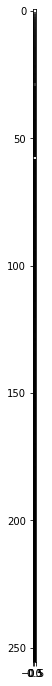

In [64]:
im = im_array[10]
fig, ax = plt.subplots(figsize = (12, 12))
ax.imshow(im, cmap = 'gray')
plt.show()

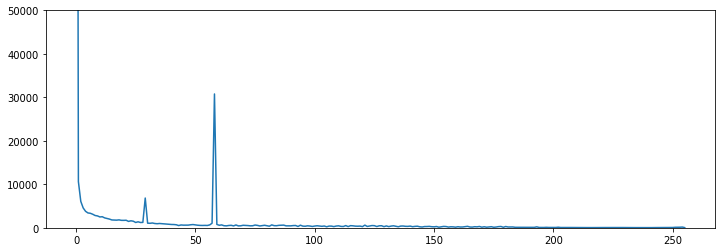

In [60]:
# calculate frequency of pixels in range 0-255 
histg = cv2.calcHist([im],[0],None,[256],[0,256]) 
fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(histg)
ax.set_ylim(0, 50000)
plt.show()

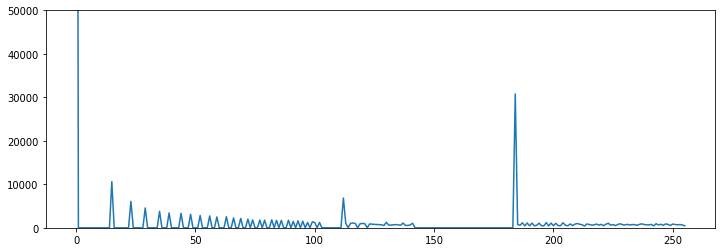

In [61]:
# creating a Histograms Equalization 
# of a image using cv2.equalizeHist() 
equ = cv2.equalizeHist(im_scaled) 

# calculate frequency of pixels in range 0-255 
histg = cv2.calcHist([equ],[0],None,[256],[0,256]) 
fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(histg)
ax.set_ylim(0, 50000)
plt.show()

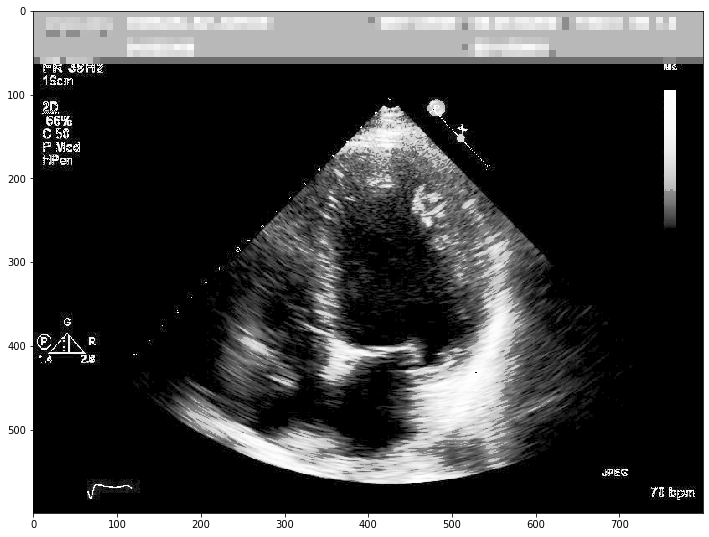

In [62]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.imshow(equ, cmap = 'gray')
plt.show()